In [1]:
from utils import prepare_image_forgery_dataset

data_directory = '../data'

IMG_SIZE=(128, 128)

X_train, X_test, y_train, y_test = prepare_image_forgery_dataset(total_number=6000, test_size=0.2, random_state=42, 
                                                                 data_directory=data_directory, img_size=IMG_SIZE)

2024-07-08 20:38:38.668519: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 20:38:38.668604: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 20:38:38.669759: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-08 20:38:38.677278: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-08 20:38:39.405303: W tensorflow/compiler/tf2

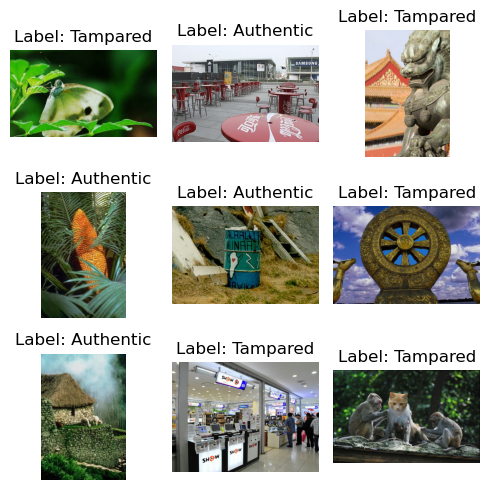

In [2]:
from utils import display_images

classnames = ['Authentic', 'Tampared']

display_images(X_train, y_train, classnames=classnames)

In [3]:
from models.cnn import CNNImageForgeryDetector

model = CNNImageForgeryDetector(compression_quality=80, learning_rate=0.001, img_size=IMG_SIZE)

In [4]:
history = model.fit(X_train, y_train)

Epoch 1/10
135/135 [==============================] - 120s 885ms/step - loss: 1.1779 - accuracy: 0.5931 - val_loss: 0.6593 - val_accuracy: 0.6167
Epoch 2/10
135/135 [==============================] - 119s 885ms/step - loss: 0.5774 - accuracy: 0.6731 - val_loss: 0.5909 - val_accuracy: 0.6500
Epoch 3/10
135/135 [==============================] - 120s 887ms/step - loss: 0.4014 - accuracy: 0.8181 - val_loss: 0.5710 - val_accuracy: 0.6521
Epoch 4/10
135/135 [==============================] - 119s 883ms/step - loss: 0.1992 - accuracy: 0.9255 - val_loss: 0.8801 - val_accuracy: 0.7104
Epoch 5/10
135/135 [==============================] - 119s 879ms/step - loss: 0.0767 - accuracy: 0.9778 - val_loss: 1.0662 - val_accuracy: 0.6729
Epoch 6/10
135/135 [==============================] - 118s 877ms/step - loss: 0.0489 - accuracy: 0.9896 - val_loss: 1.4493 - val_accuracy: 0.6979
Epoch 7/10
135/135 [==============================] - 125s 930ms/step - loss: 0.0191 - accuracy: 0.9968 - val_loss: 1.1789 -

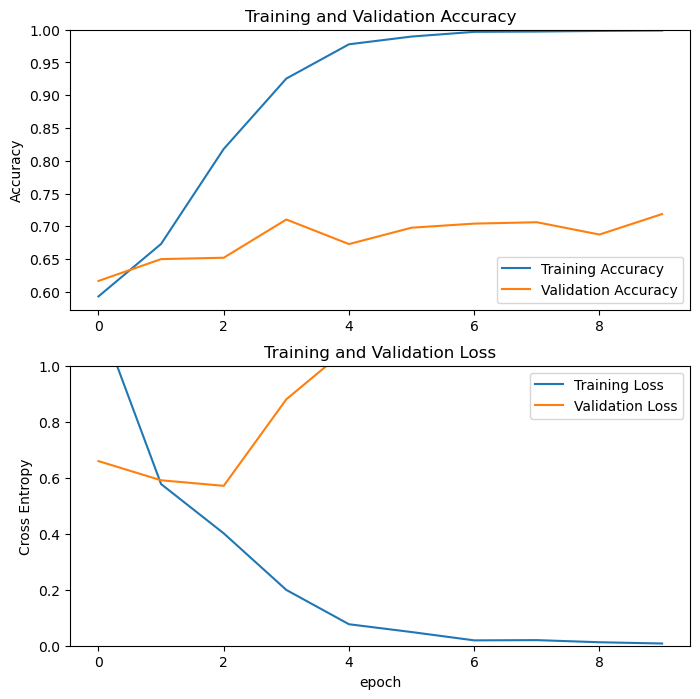

In [5]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [8]:
X_processed = model.prepare_dataset(X_test)
predictions = model.model.predict(X_processed)

38/38 [==============================] - 4s 114ms/step


In [13]:
y_pred = []
for i in range(len(predictions)):
    input_image = predictions[i]
    true_label = y_test[i]
    predicted_label = 1 if predictions[i][0] < predictions[i][1] else 0    
    y_pred.append(predicted_label)

In [14]:
from utils import print_model_performance_metrics

print_model_performance_metrics(y_test, y_pred)

+----------------------+--------------------+
| Metric               |              Value |
+----------------------+--------------------+
| False Positives (FP) |                192 |
| False Negatives (FN) |                194 |
| True Positives (TP)  |                286 |
| True Negatives (TN)  |                528 |
| Precision            | 0.5983263598326359 |
| Recall               | 0.5958333333333333 |
| F1-score             | 0.5970772442588727 |
| Overall Accuracy     | 0.6783333333333333 |
+----------------------+--------------------+
